In [38]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [39]:
data = np.load("../input/face-dataset/ORL_faces.npz")
# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

In [40]:
cnn_model= Sequential([
    Conv2D(filters=64, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [41]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 108, 88, 64)       1664      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 44, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 50, 40, 64)        102464    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 20, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 2024)              64770024  
_________________________________________________________________
dropout_12 (Dropout)         (None, 2024)             

In [42]:
history = cnn_model.fit(x_train,y_train,validation_data = (x_valid,y_valid),verbose = 0, epochs = 250, batch_size = 128)

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

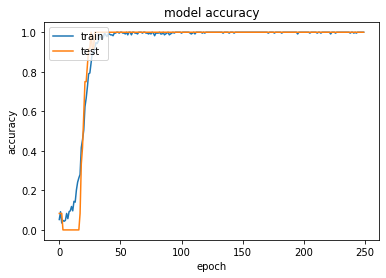

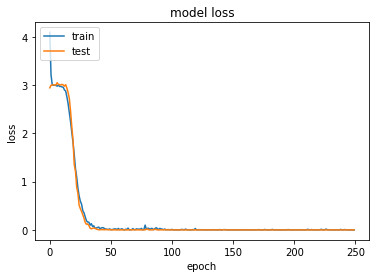

In [44]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
score = cnn_model.evaluate(x_test,y_test, verbose=0)

print(f'test los:{score[0]}')
print(f'test acc:{score[1]}')

test los:0.678402841091156
test acc:0.9125000238418579
